In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,NaN,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,NaN,1.746400
1,-0.098505,-0.17857,2.06280,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,NaN,0.641450
2,-0.169460,0.50153,2.47090,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,NaN,0.47279,0.58809,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,NaN,NaN
4,0.098830,0.23418,NaN,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,-2.68670,1.57600,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,NaN,-4.03460,3.10040,1.34610,1.377300,2.28870,NaN,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.03100,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.57700,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	53
float64		column 2	78
float64		column 3	105
float64		column 4	52
float64		column 5	39
float64		column 6	92
float64		column 7	91
float64		column 8	52
float64		column 9	91
float64		column 10	105
float64		column 11	105
float64		column 12	79


In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,747.000000,722.000000,695.000000,748.000000,761.000000,708.000000,709.000000,748.000000,709.000000,695.000000,695.000000,721.000000
mean,1.498918,1.275028,1.985531,1.915301,2.008276,1.989422,1.952032,2.037564,2.007389,2.005271,1.949393,1.959055
std,2.729286,3.556186,1.101597,1.144981,1.162538,1.105480,1.121326,1.108220,1.117185,1.116420,1.134312,1.082138
min,-4.692600,-6.952900,0.020547,0.002628,0.022079,0.002230,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.387760,-0.550918,1.060850,0.929415,0.987610,1.059700,1.007500,1.082250,1.106700,1.098300,0.981320,1.034300
50%,0.675880,0.560365,1.989300,1.882450,2.054700,1.997250,1.939300,2.030600,1.997500,2.014600,1.941300,1.942200
75%,3.971900,4.409300,2.837950,2.912875,3.001900,2.898925,2.883500,2.947650,2.963600,2.951400,2.882450,2.818300
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.997800,3.998200,3.996200,3.997600,3.983200,3.997000


<AxesSubplot:>

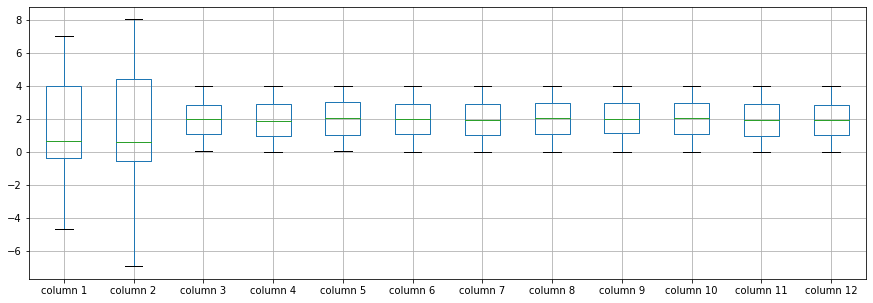

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1     1.498918
column 2     1.275028
column 3     1.985531
column 4     1.915301
column 5     2.008276
column 6     1.989422
column 7     1.952032
column 8     2.037564
column 9     2.007389
column 10    2.005271
column 11    1.949393
column 12    1.959055
dtype: float64

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.388588,-0.050905,-0.000253,0.037731,0.029492,-0.024473,0.021269,-0.003993,0.032484,0.029476,0.052943
column 2,-0.388588,1.000000,0.019078,-0.025561,-0.057934,0.011959,0.053995,-0.016628,-0.024195,-0.068013,-0.049792,-0.004211
column 3,-0.050905,0.019078,1.000000,-0.023221,0.052324,-0.024270,0.015029,0.037957,0.004501,0.008509,-0.061714,0.024179
column 4,-0.000253,-0.025561,-0.023221,1.000000,-0.012365,-0.038036,0.024485,0.049150,-0.049389,0.027040,0.038855,0.014711
column 5,0.037731,-0.057934,0.052324,-0.012365,1.000000,0.052507,0.032481,0.013522,0.008719,-0.020607,-0.050191,0.017608
column 6,0.029492,0.011959,-0.024270,-0.038036,0.052507,1.000000,-0.085491,0.038753,0.030696,-0.002932,0.001902,-0.011790
column 7,-0.024473,0.053995,0.015029,0.024485,0.032481,-0.085491,1.000000,-0.063198,0.001266,-0.025384,-0.021195,-0.008300
column 8,0.021269,-0.016628,0.037957,0.049150,0.013522,0.038753,-0.063198,1.000000,-0.028881,-0.032461,0.001816,-0.030599
column 9,-0.003993,-0.024195,0.004501,-0.049389,0.008719,0.030696,0.001266,-0.028881,1.000000,0.016767,0.017783,-0.044655
column 10,0.032484,-0.068013,0.008509,0.027040,-0.020607,-0.002932,-0.025384,-0.032461,0.016767,1.000000,-0.081117,0.047543


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [12,12+45,12+45+45,12+45+45+45,12+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45+45+45,12+45+45+45+45+45+45,12+45+45+45+45+45,12+45+45+45+45,12+45+45+45,12+45+45,12+45,12], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.518987922668458
Epoch: 1 , loss: 25.88763595581055
Epoch: 2 , loss: 22.805096855163573
Epoch: 3 , loss: 22.030159225463866
Epoch: 4 , loss: 21.541829948425292
Epoch: 5 , loss: 21.287082176208497
Epoch: 6 , loss: 20.648045463562013
Epoch: 7 , loss: 20.495303077697756
Epoch: 8 , loss: 20.054281463623045
Epoch: 9 , loss: 19.69025417327881
Epoch: 10 , loss: 19.492818222045898
Epoch: 11 , loss: 19.22520332336426
Epoch: 12 , loss: 19.09930362701416
Epoch: 13 , loss: 18.712580223083496
Epoch: 14 , loss: 18.621746215820313
Epoch: 15 , loss: 18.31201961517334
Epoch: 16 , loss: 18.469779510498046
Epoch: 17 , loss: 18.19044563293457
Epoch: 18 , loss: 18.279986572265624
Epoch: 19 , loss: 18.18586395263672
Epoch: 20 , loss: 18.318980712890625
Epoch: 21 , loss: 18.179783515930175
Epoch: 22 , loss: 18.028229217529297
Epoch: 23 , loss: 17.87343120574951
Epoch: 24 , loss: 18.017689647674562
Epoch: 25 , loss: 17.7708

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.643621,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-3.124291,0.000000
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.708259,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,1.752846,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.579121,-1.057710
4,0.000000,0.0,0.495344,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-1.272655
...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.903089,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
796,-1.211225,0.0,0.000000,0.0,0.0,0.0,2.685046,0.0,0.0,0.0,0.000000,0.000000
797,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
798,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(64.23239430090084, 248.22200824735242)

In [18]:
NRMS=numerator/denominator
NRMS


0.25876994048365554

In [19]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.710972,3.53370,0.469590,0.67908,3.434400,2.79240,2.77630,1.69910,0.691309,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.680200,1.38880,3.21670,2.92360,1.481169,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.921600,2.64240,1.51870,2.53180,2.432800,1.876800
3,1.616796,0.47279,0.588090,1.95630,2.787000,2.59570,2.893300,1.53750,0.99942,3.65930,2.197371,2.208090
4,0.098830,0.23418,0.925044,1.63120,3.554100,2.27110,0.374250,2.17860,1.31400,1.06320,1.026900,0.915745
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.865911,-2.68670,1.576000,0.55612,0.070769,2.07470,0.803040,3.22290,3.49330,1.32550,3.231100,0.005387
796,2.255375,-4.03460,3.100400,1.34610,1.377300,2.28870,3.081176,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.225600,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.810810,3.72700,1.18790,0.95112,1.884500,1.143700


In [21]:
imputations[-1].to_excel("4-gauss_NN_10(imp).xlsx", index=False, header=False)